In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats
%matplotlib inline

In [17]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ndf = df.copy()
print(df.keys())
print(df.shape)
#churn yes means that the customer no longer is a subscriber
#variables of interest
#cat: Department, OverTime
#cont: MonthlyIncome, PercentSalaryHike, JobLevel, JobInvolvement

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 35)


In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#check to see any null data
print(np.count_nonzero(df.isnull().values))
print(df.isnull().any())
    
#check and get rid of duplicates
print(df[df.duplicated(keep=False)].shape)

0
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTime

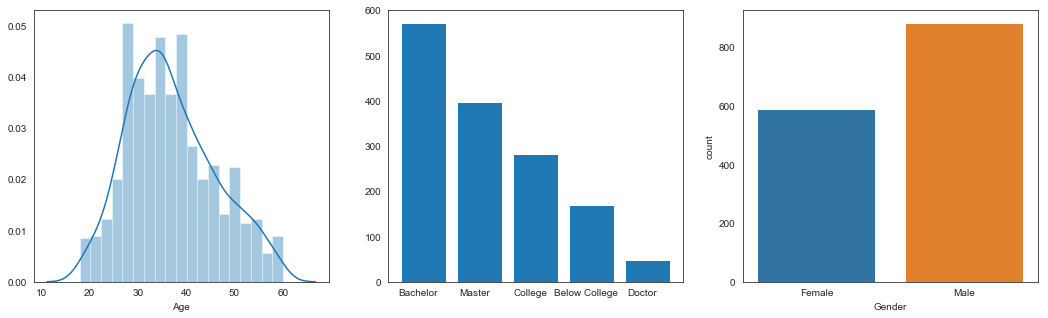

In [4]:
sns.set_style('white')
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.distplot(df.Age)

#creating a descending sort algorithm for education graph
plt.subplot(132)
replace = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
ndf['Education'] = ndf['Education'].replace(to_replace=replace)
counts = Counter(ndf['Education'])
labels, values = zip(*counts.items())
desc_sort = np.argsort(values)[::-1]

labels = np.array(labels)[desc_sort]
values = np.array(values)[desc_sort]
indexes = np.arange(len(labels))
bar_width = 0.3
plt.bar(indexes, values, align='edge')
plt.xticks(indexes + bar_width, labels)

plt.subplot(133)
sns.countplot('Gender', data=df)

plt.show()

In [5]:
#turn attrition into numeric
ndf['Attrition'] = np.where((ndf['Attrition']=="Yes"), 1, 0)

Current attrition rate from data: 16.12%


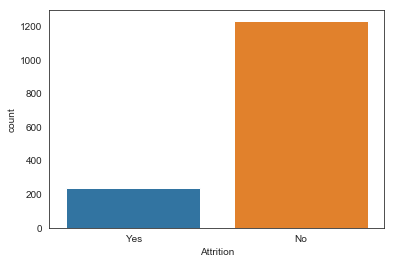

In [6]:
print("Current attrition rate from data: {0:.2f}%".format(ndf['Attrition'].mean()*100))
sns.countplot('Attrition', data=df)
plt.show()

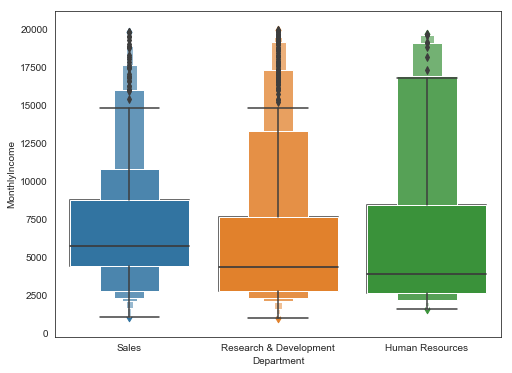

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
sns.boxenplot(x='Department', y='MonthlyIncome', data=df)

plt.show()
print(df.Department.value_counts())
#what percent of the sample are outliers

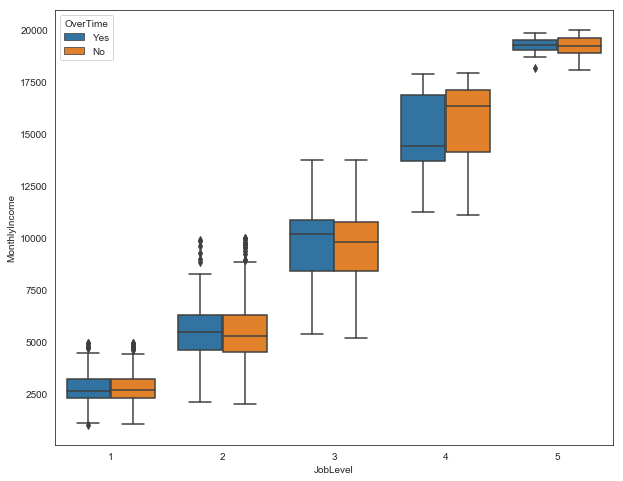

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(x='JobLevel', y='MonthlyIncome', hue='OverTime', data=df)
plt.show()
#so even with overtime people seem to have similar income across increasing job levels(1-easy, 5-hard)
#might be why some people leave

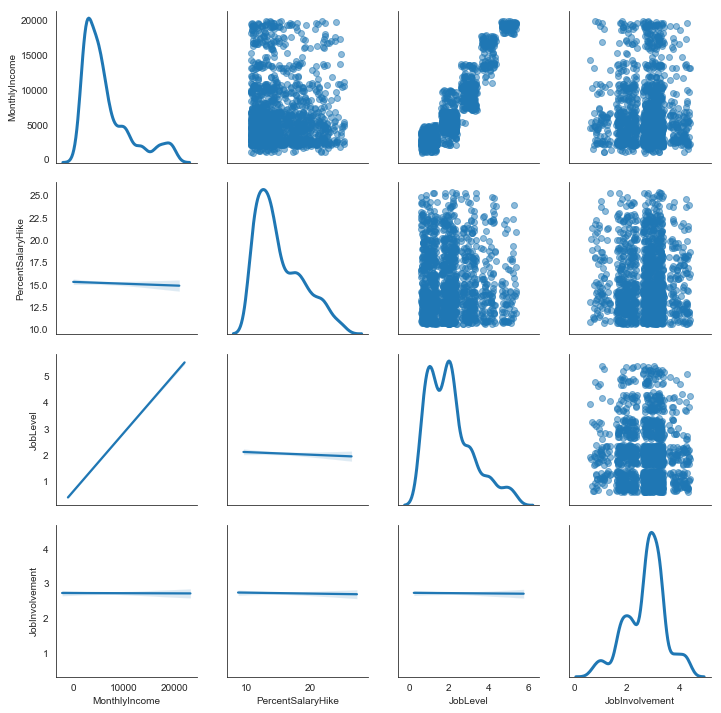

In [13]:
ndf = ndf.loc[:,['Department', 'OverTime', 'MonthlyIncome', 'PercentSalaryHike', 'JobLevel', 'JobInvolvement']]
df_jittered = ndf.loc[:, ['MonthlyIncome', 'PercentSalaryHike', 'JobLevel', 'JobInvolvement']]
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.4, .4, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [ ]:
#overtime seems like a plausable feature to look at further
features = pd.get_dummies(df['OverTime'])
features['YearlyIncome'] = df['MonthlyIncome'] * 12

In [21]:
df.EmployeeCount.describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

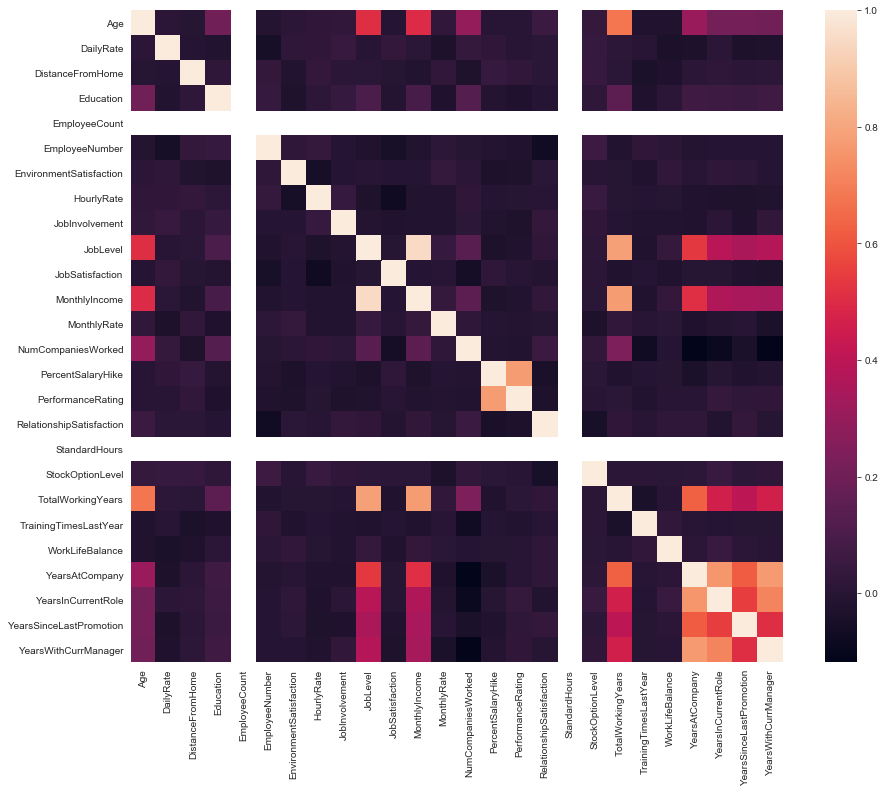

KeyError: "['ppltrst' 'pplfair' 'pplhlp'] not in index"

In [20]:
corrmat = ndf.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()


#joblevel,monthly income seem to be similar
# years at current role, years w current managerseems irrelevant
means = df[['JobLevel','MonthlyIncome','PercentSalaryHike']].mean(axis=0)
stds = df[['JobLevel','MonthlyIncome','PercentSalaryHike']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()
corrmat2
print(corrmat2)